# DSCI 100: Final Project Title


By: Arshia, James, Lily, and Raina

In [59]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

# Introduction

## provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

## clearly state the question you tried to answer with your project

Can player experience level and age predict the number of hours all players spend playing minecraft?

## identify and fully describe the dataset that was used to answer the question

|Name|Type|Variables Definiton|
|----|----|----|
|Experience|factor|Players experience level|
|Subscribe|logical|Subscription status|
|hashedEmail|character|Encrypted players emails|
|played_hours|numeric| Time played minecraft |
|Name|character|Players name|
|Gender|factor|Players gender|
|Age| numeric|Players age|


# 2.0 Methods and Results

### 2.1 Load in data

In [60]:
players_data<-read_csv("https://raw.githubusercontent.com/lilypurdy/toy_ds_project/refs/heads/main/players%20(2).csv")
head(players_data, 5)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


### 2.2 Wrangle and Clean Data

In [61]:
clean_players_data <- read_csv("https://raw.githubusercontent.com/Jamesnam1/toy_ds_project/refs/heads/main/players.csv",
    col_names = c("experience", "subscribed", "hashed_email", "hours_played", "name", "gender", "age"),
                col_types = list("c", "l", "c", "d", "c", "c", "i"))
clean_players_data

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


experience,subscribed,hashed_email,hours_played,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
experience,NA,hashedEmail,NA,name,gender,NA
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


In [62]:
players <- clean_players_data |> select(-hashed_email, -subscribed, -name, -gender)
head(players, 5)

experience,hours_played,age
<chr>,<dbl>,<int>
experience,NA,NA
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21


### 2.3 Summarize Data

In [63]:
mean_values <- players |> summarise(
    mean_played_hours = mean(hours_played, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE))

mean_values

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


### 2.4 Visualization

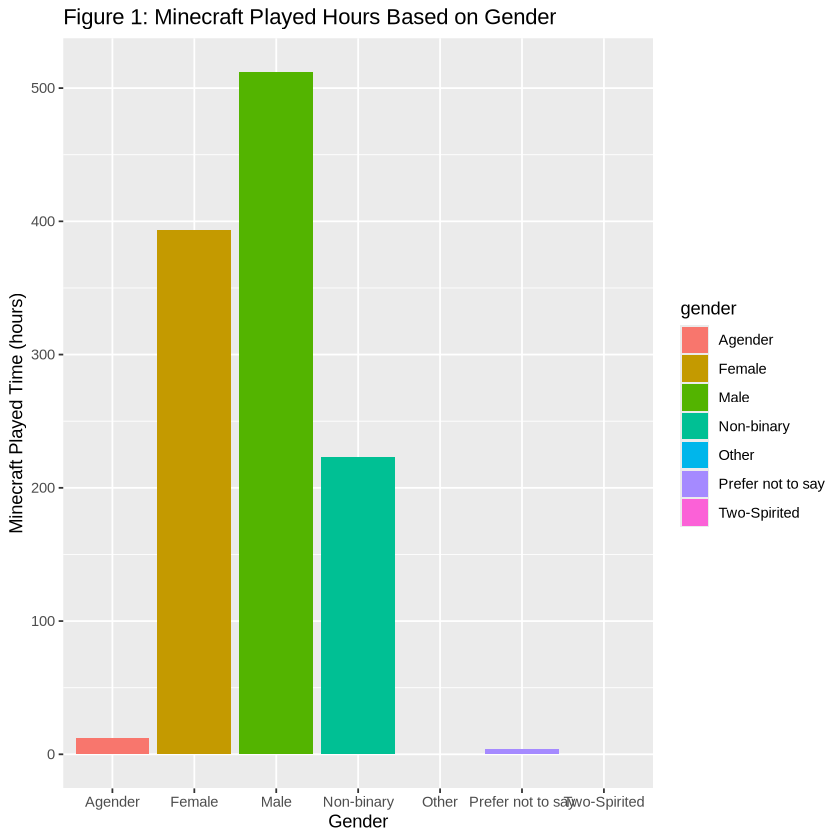

In [64]:
ggplot(players_data, aes(x = gender, y = played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Gender", x = "Gender", y = "Minecraft Played Time (hours)")


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


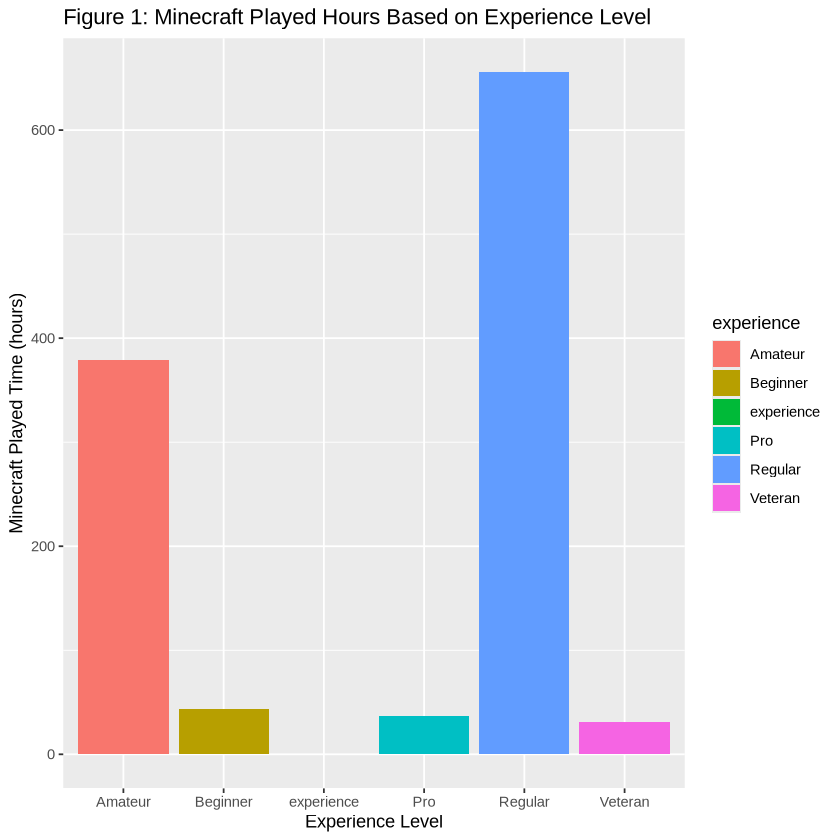

In [65]:
ggplot(players, aes(x = experience, y = hours_played, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 1: Minecraft Played Hours Based on Experience Level", x = "Experience Level", y = "Minecraft Played Time (hours)")


Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 88 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


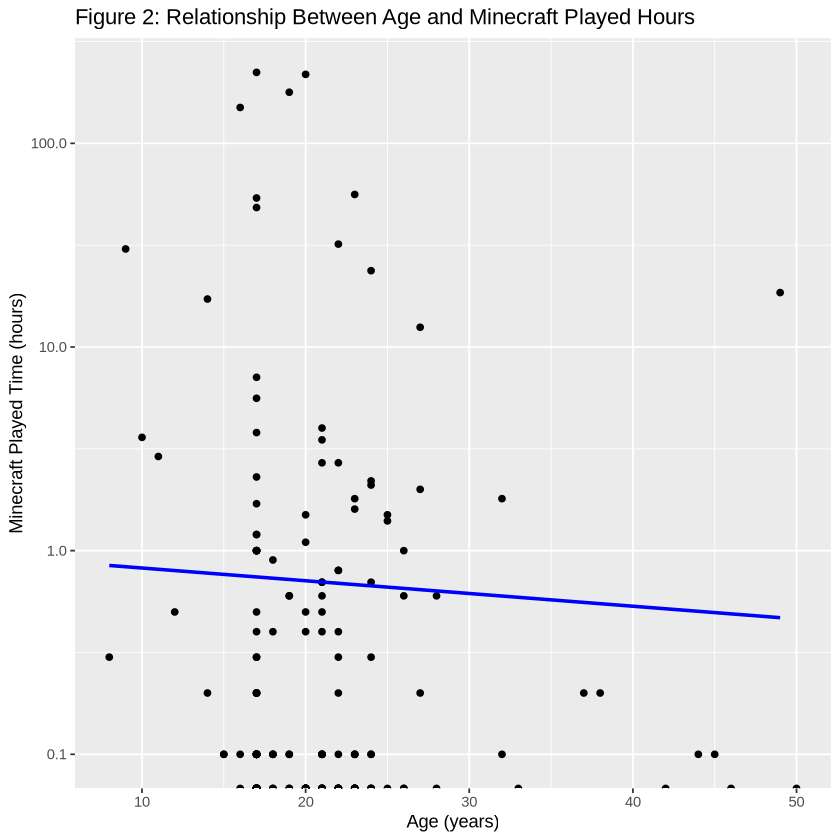

In [66]:
ggplot(players, aes(x = age, y = hours_played)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE, color = "blue") +
    labs(title = "Figure 2: Relationship Between Age and Minecraft Played Hours", 
         x = "Age (years)", 
         y = "Minecraft Played Time (hours)") +
    scale_y_log10(labels = label_comma())


## 2.5 Splitting Data

In [67]:
#set the training data to 75 percent of the overall percentage
split_data <- initial_split(clean_players_data, prop = 3/4, strata = hours_played)

training_data <- training(split_data)
testing_data <- testing(split_data)

head(training_data)

experience,subscribed,hashed_email,hours_played,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


# Arshia Regression 1

In [68]:
data_recipe <- recipe(hours_played ~ age, data = training_data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

data_spec <- nearest_neighbor(weight_func = "rectangular",
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

data_vfold <- vfold_cv(training_data, v = 5, strata = hours_played)

data_wkflw <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(data_spec)

data_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [73]:
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

data_results <- data_wkflw |>
  tune_grid(resamples = data_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

# show the results`
data_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,41.39624,3,5.656291,Preprocessor1_Model01
6,rmse,standard,31.69813,3,12.976870,Preprocessor1_Model02
11,rmse,standard,30.75541,3,13.358875,Preprocessor1_Model03
16,rmse,standard,30.35636,3,13.298553,Preprocessor1_Model04
21,rmse,standard,29.31367,3,13.578254,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
76,rmse,standard,30.34853,3,11.77863,Preprocessor1_Model16
81,rmse,standard,30.29724,3,11.85235,Preprocessor1_Model17
86,rmse,standard,30.14229,3,11.97098,Preprocessor1_Model18


In [75]:
# show only the row of minimum RMSPE
data_min <- data_results |>
  filter(mean == min(mean))

data_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
26,rmse,standard,29.21182,3,13.7674,Preprocessor1_Model06


In [72]:
# Extract best K value
kmin <- data_min |> pull(neighbors)

# Define model specification with best K
sacr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

# Fit the model
data_fit <- workflow() |>
  add_recipe(data_recipe) |>
  add_model(sacr_spec) |>
  fit(data = training_data)

# Predict and evaluate RMSE
data_summary <- data_fit |>
  predict(testing_data) |>
  bind_cols(testing_data) |>
  metrics(truth = hours_played, estimate = .pred) |>
  filter(.metric == "rmse")

data_summary


ERROR: [1m[33mError[39m in `bind_cols()`:[22m
[33m![39m Can't recycle `..1` (size 49) to match `..2` (size 50).


Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


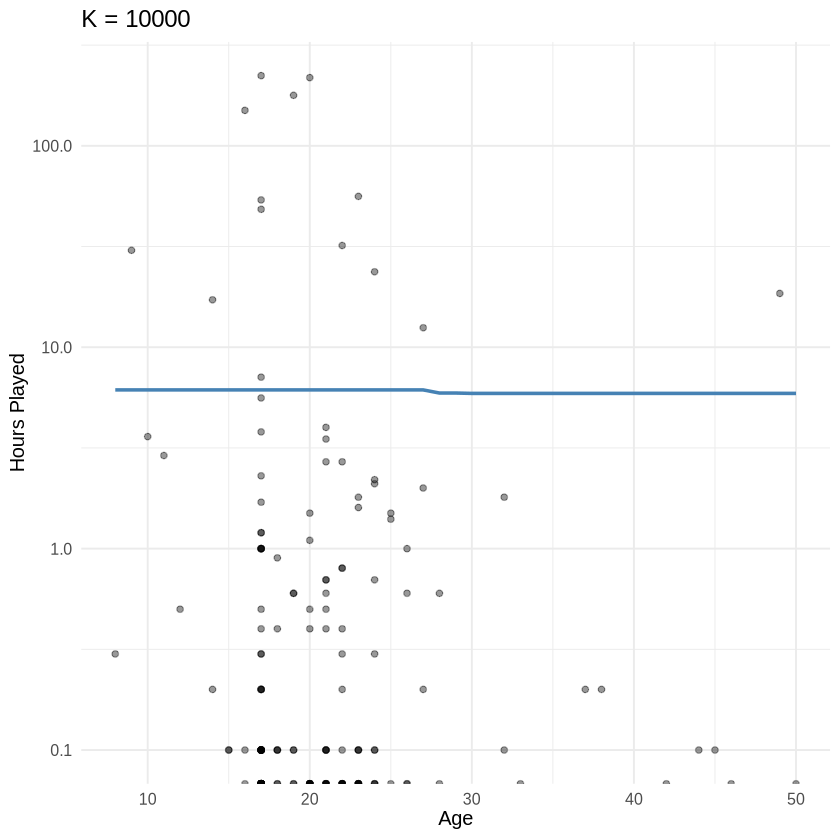

In [32]:
# Define the value of K (replace with actual selected K if available)
kmin <- 20  # Or use the best K from tuning results

# Create prediction grid over age range
age_prediction_grid <- tibble(
  age = seq(
    from = min(clean_players_data$age, na.rm = TRUE),
    to = max(clean_players_data$age, na.rm = TRUE),
    by = 1
  )
)

# Generate predictions from the fitted model
data_preds <- data_fit |>
  predict(new_data = age_prediction_grid) |>
  bind_cols(age_prediction_grid)

# Plot actual data and predicted line
plot_final <- ggplot(clean_players_data, aes(x = age, y = hours_played)) +
  geom_point(alpha = 0.4) +
  geom_line(data = data_preds, aes(x = age, y = .pred), color = "steelblue", linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played") +
  ggtitle(paste0("K = ", kmin)) +
    scale_y_log10(labels=comma)+
  theme_minimal(base_size = 12)

# Display the plot
plot_final


## 2.6 Performing Data Analysis:

In order to predict the "hours_played" using "Age" and "experience", we chose to build a linear regression model to find the correlation between "hours_played" and "Age", and "hours_played" "experience." The first step is to set up the recipe equation to determine the independent variable, dependent variable, and the range of data to be selected. Then I choose linear_reg() in linear regression to complete the specialization, and then build the model through workflow(). Finally, ggplot is used to help linear regression to achieve visualization, so that the relationship between the two can be observed from the image in a more simple and clear way.

### Building model & Visualization (Age & Hours_Played - Training Data)

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_line()`).”


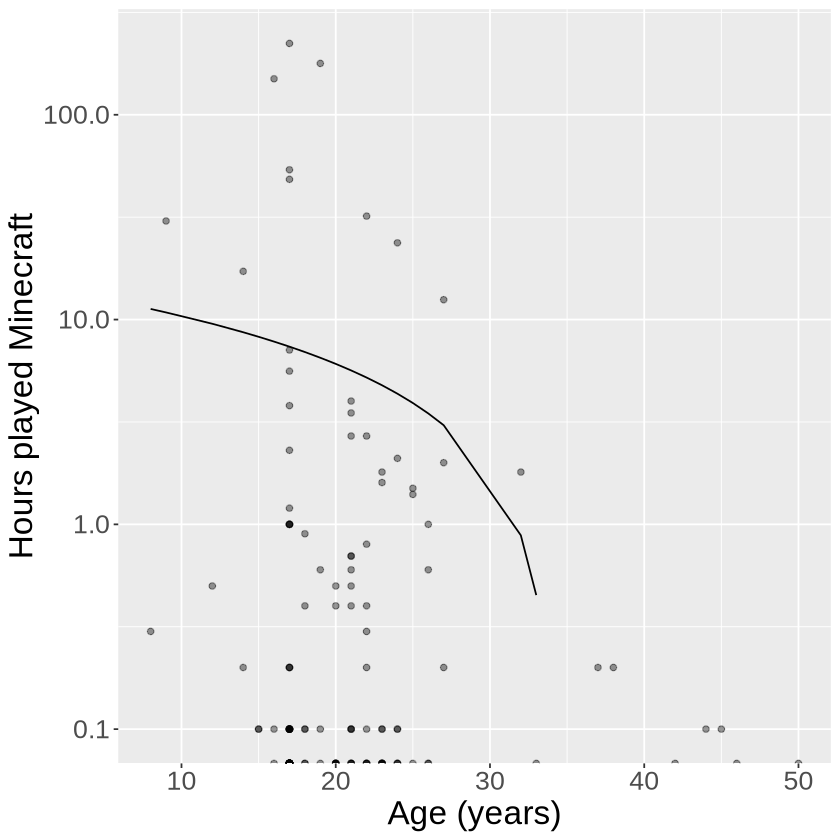

In [51]:
# Recipe
age_recipe_training <- recipe(hours_played ~ age, data = training_data)

# Model Specification
age_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Workflow
age_model_training <- workflow() |>
  add_recipe(age_recipe_training) |>
  add_model(age_spec_training) |>
  fit(data = training_data)

# Generate predictions
age_preds_training <- age_model_training |>
  predict(training_data) |>
  bind_cols(training_data)

# Visualization
age_predictions_training <- ggplot(data = age_preds_training, aes(x = age, y = hours_played)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = .pred), color = "black") +
  xlab("Age (years)") +
  ylab("Hours played Minecraft") +
  theme(text = element_text(size = 20)) +
  scale_y_log10(labels = label_comma())

age_predictions_training 

# Discussion

In [13]:
#Recipe
trestbps_recipe_training <- recipe(age ~ trestbps, data = training_data)

#Specification
trestbps_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

#Workflow
trestbps_model_training <- workflow() |>
  add_recipe(trestbps_recipe_training) |>
  add_model(trestbps_spec_training) |>
  fit(data = training_data)

trestbps_preds_training <- trestbps_model_training |>
  predict(training_data)|>
  bind_cols(training_data)

#Visualization
trestbps_predictions_training <- trestbps_preds_training |>
     ggplot(aes(x = trestbps, y = age)) +
        geom_point(alpha = 0.4) +
        geom_line(
             mapping = aes(x = trestbps, y = .pred), 
             color = "black") +
         xlab("Resting blood pressure (trestbps)") +
         ylab("Age - Level of Heart Disease") +
         theme(text = element_text(size = 20))

trestbps_predictions_training


ERROR: Error in eval(expr, envir, enclos): object 'ss' not found


In [5]:
# Split data
split_data <- initial_split(players, prop = 3/4, strata = played_hours)

# Create training and testing sets
training_data <- training(split_data)
testing_data <- testing(split_data)

# Recipe
age_recipe_training <- recipe(played_hours ~ Age, data = training_data)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Model Specification
age_spec_training <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

# Workflow
age_model_training <- workflow() |>
  add_recipe(age_recipe_training) |>
  add_model(age_spec_training) |>
  fit(data = training_data)

# Generate predictions
age_preds_training <- age_model_training |>
  predict(training_data) |>
  bind_cols(training_data)

# Visualization
age_predictions_training <- ggplot(data = age_preds_training, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(aes(y = .pred), color = "black") +
  xlab("Age (years)") +
  ylab("Hours played Minecraft") +
  theme(text = element_text(size = 20))

age_predictions_training 

ERROR: Error in eval(expr, envir, enclos): object 'players' not found
